In [10]:
from fastai.vision.all import *

In [6]:
path = untar_data(URLs.IMAGENETTE_320)

In [27]:
img = array(Image.open((path/'train').ls()[0].ls()[0]))

(<AxesSubplot:>, (320, 463, 3))

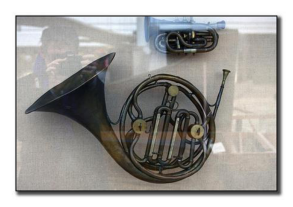

In [30]:
show_image(img),img.shape

(<AxesSubplot:>, (160, 231, 3))

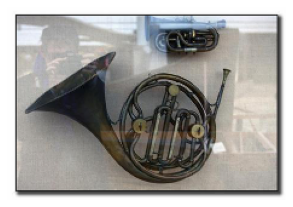

In [39]:
down_sized= img[:-1:2,:-1:2]//2+img[1::2,1::2]//2
show_image(down_sized),down_sized.shape

In [201]:
img.transpose(2,0,1).shape,array([1/3,1/3,1/3]).shape

((3, 320, 463), (3,))

<AxesSubplot:>

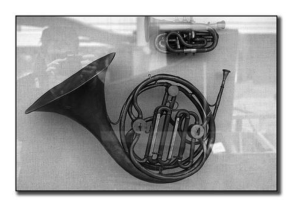

In [219]:
gray_scale= array([1/3,1/3,1/3])@img[...,None]
show_image(gray_scale,cmap='gray') #have to use cmap otherwise uses "heatmap" like coloring. 

<AxesSubplot:>

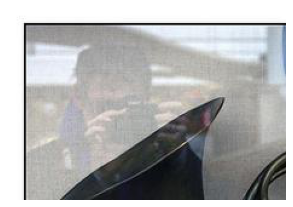

In [152]:
show_image(img[:img.shape[0]//2,:img.shape[1]//2])

<AxesSubplot:>

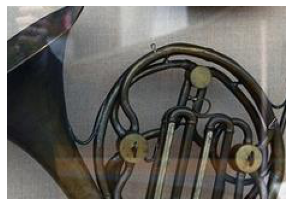

In [153]:
show_image(img[img.shape[0]//4:-img.shape[0]//4,img.shape[1]//4:-img.shape[1]//4])

<AxesSubplot:>

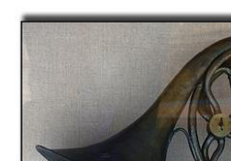

In [154]:
show_image(img[:img.shape[0]//2:-1,:img.shape[1]//2])

In [156]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [180]:
norm_tfm=Normalize.from_stats(*imagenet_stats,cuda=False)
def show_norm(img): show_images((norm_tfm.decode(img).clamp(0,1)),nrows=3)

In [170]:
norm_img = norm_tfm(TensorImage(img.transpose(2,0,1)).float()[None]/255)

In [171]:
noise= torch.randn_like(norm_img)

In [172]:
As = torch.linspace(0,1,12)[...,None,None,None]; As.squeeze()

tensor([0.0000, 0.0909, 0.1818, 0.2727, 0.3636, 0.4545, 0.5455, 0.6364, 0.7273,
        0.8182, 0.9091, 1.0000])

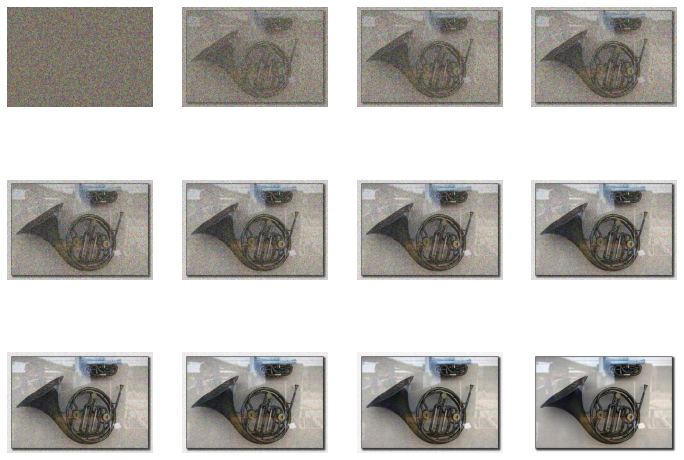

In [181]:
show_norm((As)**.5*norm_img+(1-As)**.5*noise)

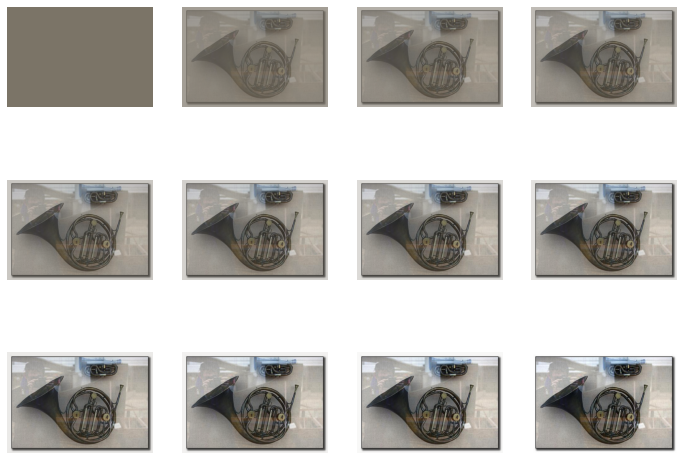

In [182]:
show_norm((As)**.5*norm_img)

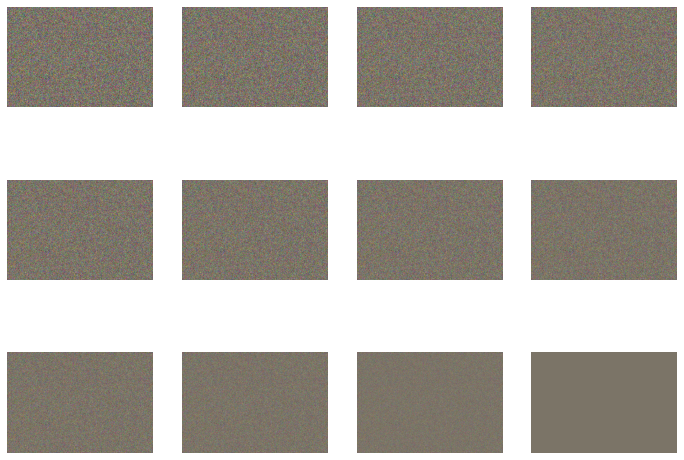

In [183]:
show_norm((1-As)**.5*noise)